
Training with SGD optimizer:
Epoch 0: Loss = 0.383591
Epoch 100: Loss = 0.106921
Epoch 200: Loss = 0.018698
Epoch 300: Loss = 0.002732
Epoch 400: Loss = 0.000386
Epoch 500: Loss = 0.000055
Epoch 600: Loss = 0.000008
Epoch 700: Loss = 0.000001
Epoch 800: Loss = 0.000000
Epoch 900: Loss = 0.000000

Training with BatchGD optimizer:
Epoch 0: Loss = 0.383591
Epoch 100: Loss = 0.106921
Epoch 200: Loss = 0.018698
Epoch 300: Loss = 0.002732
Epoch 400: Loss = 0.000386
Epoch 500: Loss = 0.000055
Epoch 600: Loss = 0.000008
Epoch 700: Loss = 0.000001
Epoch 800: Loss = 0.000000
Epoch 900: Loss = 0.000000

Training with Momentum optimizer:
Epoch 0: Loss = 0.383591
Epoch 100: Loss = 0.000002
Epoch 200: Loss = 0.000000
Epoch 300: Loss = 0.000000
Epoch 400: Loss = 0.000000
Epoch 500: Loss = 0.000000
Epoch 600: Loss = 0.000000
Epoch 700: Loss = 0.000000
Epoch 800: Loss = 0.000000
Epoch 900: Loss = 0.000000

Training with Adam optimizer:
Epoch 0: Loss = 0.383591
Epoch 100: Loss = 0.000874
Epoch 200: Los

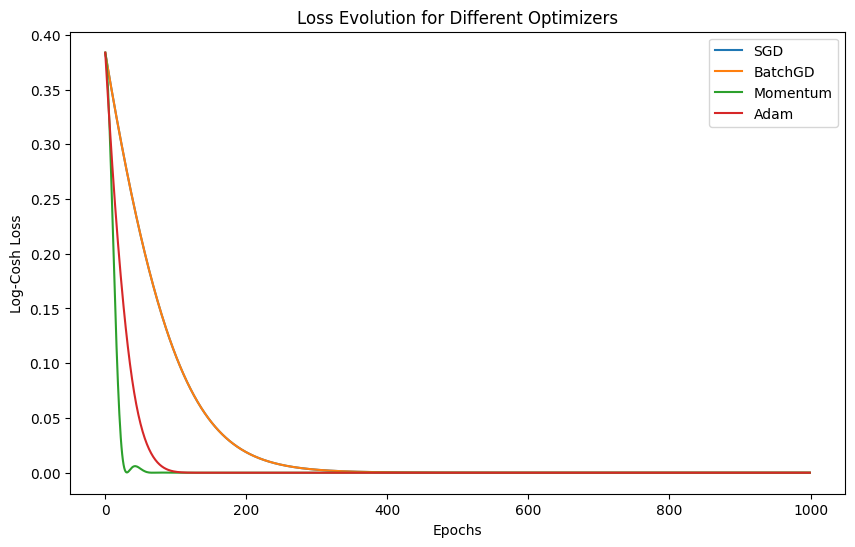


Final Weights for SGD: [0.77170732 0.48616571 0.192543   0.38767369]

Final Weights for BatchGD: [0.77170732 0.48616571 0.192543   0.38767369]

Final Weights for Momentum: [0.77175779 0.48621147 0.19257473 0.38770315]

Final Weights for Adam: [0.77175779 0.48621147 0.19257473 0.38770315]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

file_path = "data.csv"
data = pd.read_csv(file_path)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

def initialize_weights(n_features):
    return np.zeros(n_features)

def log_cosh_loss(y_true, y_pred):
    return np.mean(np.log(np.cosh(y_true - y_pred)))

def log_cosh_gradient(y_true, y_pred, X):
    error = y_pred - y_true
    return np.dot(X.T, np.tanh(error)) / len(y_true)

class Optimizer:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, weights, gradient):
        return weights - self.lr * gradient

class SGD(Optimizer):
    def update(self, weights, gradient):
        return weights - self.lr * gradient

class BatchGD(Optimizer):
    def update(self, weights, gradient):
        return weights - self.lr * gradient

class Momentum(Optimizer):
    def __init__(self, lr=0.01, momentum=0.9):
        super().__init__(lr)
        self.momentum = momentum
        self.velocity = 0

    def update(self, weights, gradient):
        self.velocity = self.momentum * self.velocity - self.lr * gradient
        return weights + self.velocity

class Adam(Optimizer):
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(lr)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_t = 0
        self.v_t = 0
        self.t = 0

    def update(self, weights, gradient):
        self.t += 1
        self.m_t = self.beta1 * self.m_t + (1 - self.beta1) * gradient
        self.v_t = self.beta2 * self.v_t + (1 - self.beta2) * (gradient ** 2)

        m_t_hat = self.m_t / (1 - self.beta1 ** self.t)
        v_t_hat = self.v_t / (1 - self.beta2 ** self.t)

        return weights - self.lr * m_t_hat / (np.sqrt(v_t_hat) + self.epsilon)

def train(X, y, optimizer, epochs=1000):
    weights = initialize_weights(X.shape[1])
    loss_history = []

    for epoch in range(epochs):
        y_pred = np.dot(X, weights)
        loss = log_cosh_loss(y, y_pred)
        loss_history.append(loss)

        gradient = log_cosh_gradient(y, y_pred, X)
        weights = optimizer.update(weights, gradient)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.6f}")

    return weights, loss_history


optimizers = {
    "SGD": SGD(lr=0.01),
    "BatchGD": BatchGD(lr=0.01),
    "Momentum": Momentum(lr=0.01, momentum=0.9),
    "Adam": Adam(lr=0.01)
}

results = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    weights, loss_history = train(X_train, y_train, optimizer, epochs=1000)
    results[name] = (weights, loss_history)

# Plot Loss Evolution
plt.figure(figsize=(10, 6))
for name, (_, loss_history) in results.items():
    plt.plot(loss_history, label=name)

plt.xlabel("Epochs")
plt.ylabel("Log-Cosh Loss")
plt.title("Loss Evolution for Different Optimizers")
plt.legend()
plt.show()

# Print Final Weights
for name, (weights, _) in results.items():
    print(f"\nFinal Weights for {name}: {weights}")


SGD - Epoch 0: Loss = 0.382940
SGD - Epoch 100: Loss = 0.345337
SGD - Epoch 200: Loss = 0.309816
SGD - Epoch 300: Loss = 0.276460
SGD - Epoch 400: Loss = 0.245338
SGD - Epoch 500: Loss = 0.216499
SGD - Epoch 600: Loss = 0.189971
SGD - Epoch 700: Loss = 0.165751
SGD - Epoch 800: Loss = 0.143814
SGD - Epoch 900: Loss = 0.124102
BatchGD - Epoch 0: Loss = 0.382940
BatchGD - Epoch 100: Loss = 0.345337
BatchGD - Epoch 200: Loss = 0.309816
BatchGD - Epoch 300: Loss = 0.276460
BatchGD - Epoch 400: Loss = 0.245338
BatchGD - Epoch 500: Loss = 0.216499
BatchGD - Epoch 600: Loss = 0.189971
BatchGD - Epoch 700: Loss = 0.165751
BatchGD - Epoch 800: Loss = 0.143814
BatchGD - Epoch 900: Loss = 0.124102
Momentum - Epoch 0: Loss = 0.382940
Momentum - Epoch 100: Loss = 0.114936
Momentum - Epoch 200: Loss = 0.017567
Momentum - Epoch 300: Loss = 0.002080
Momentum - Epoch 400: Loss = 0.000236
Momentum - Epoch 500: Loss = 0.000027
Momentum - Epoch 600: Loss = 0.000003
Momentum - Epoch 700: Loss = 0.000000
Mo

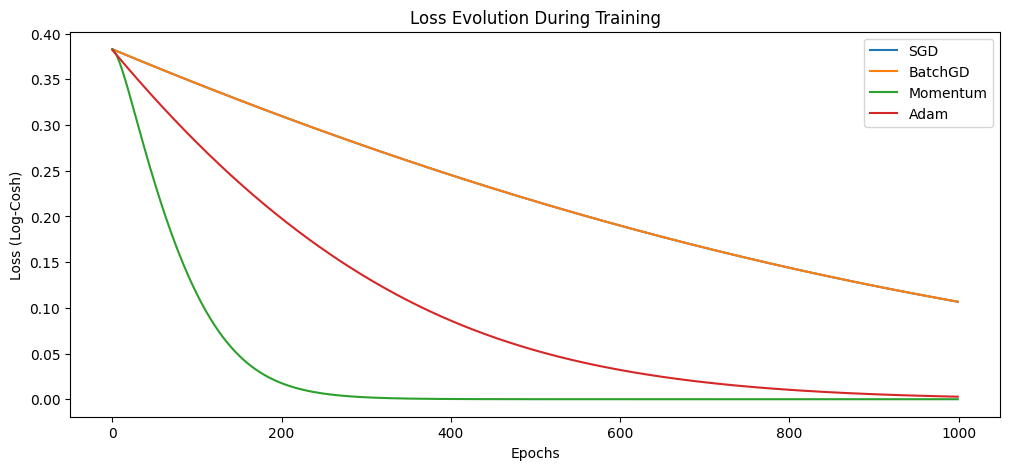

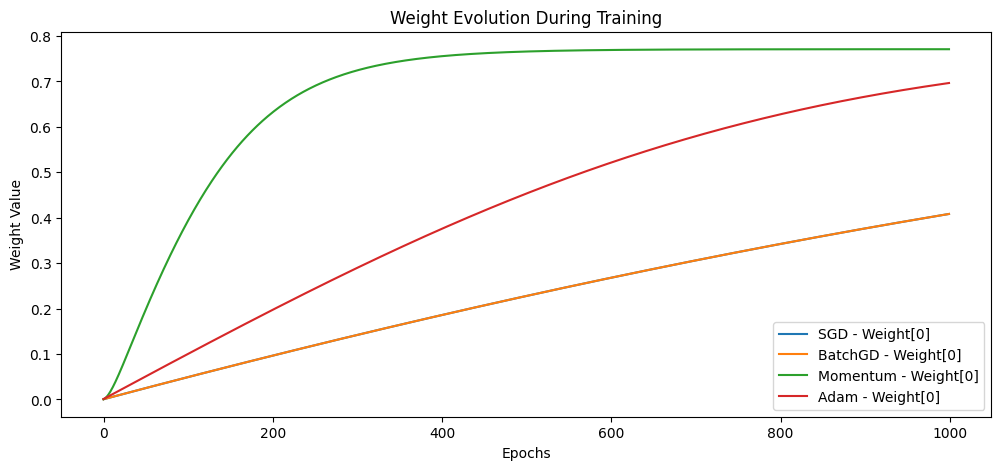

SGD Final Weights: [0.40825613 0.24373394 0.08794201 0.19716678]
BatchGD Final Weights: [0.40825613 0.24373394 0.08794201 0.19716678]
Momentum Final Weights: [0.77085022 0.4845631  0.19212967 0.38725144]
Adam Final Weights: [0.69647546 0.48090181 0.19125065 0.38748369]

Model Comparison:
SGD: MSE=0.233422, R²=0.767330
BatchGD: MSE=0.233422, R²=0.767330
Momentum: MSE=0.000000, R²=1.000000
Adam: MSE=0.005521, R²=0.994496


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import pandas as pd
data = pd.read_csv('data.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def log_cosh_loss(y_true, y_pred):
    error = np.clip(y_true - y_pred, -50, 50)  # Avoid overflow in cosh
    return np.mean(np.log(np.cosh(error)))

def compute_gradient(X, y, weights):
    m = len(y)
    y_pred = X.dot(weights)
    error = np.clip(y - y_pred, -50, 50)  # Avoid large values
    gradient = -1/m * X.T.dot(np.tanh(error))  # Derivative of log-cosh
    return gradient

class Optimizer:
    def __init__(self, lr=0.001):
        self.lr = lr

class SGD(Optimizer):
    def update(self, weights, gradient):
        return weights - self.lr * gradient

class BatchGD(Optimizer):
    def update(self, weights, gradient):
        return weights - self.lr * gradient

class Momentum(Optimizer):
    def __init__(self, lr=0.001, momentum=0.9):
        super().__init__(lr)
        self.momentum = momentum
        self.velocity = 0

    def update(self, weights, gradient):
        self.velocity = self.momentum * self.velocity - self.lr * gradient
        return weights + self.velocity

class Adam(Optimizer):
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(lr)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0

    def update(self, weights, gradient):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradient ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        return weights - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

epochs = 1000
optimizers = {
    "SGD": SGD(lr=0.001),
    "BatchGD": BatchGD(lr=0.001),
    "Momentum": Momentum(lr=0.001, momentum=0.9),
    "Adam": Adam(lr=0.001)
}

results = {}

for opt_name, optimizer in optimizers.items():
    weights = np.zeros(X_train.shape[1])  # Initialize weights
    loss_history = []
    weight_history = []

    for epoch in range(epochs):
        gradient = compute_gradient(X_train, y_train, weights)
        weights = optimizer.update(weights, gradient)

        loss = log_cosh_loss(y_train, X_train.dot(weights))
        loss_history.append(loss)
        weight_history.append(weights.copy())

        if epoch % 100 == 0:
            print(f"{opt_name} - Epoch {epoch}: Loss = {loss:.6f}")

    # Evaluate on test set
    y_pred = X_test.dot(weights)
    mse = np.mean((y_test - y_pred) ** 2)
    r2 = r2_score(y_test, y_pred)

    results[opt_name] = {
        "weights": weights,
        "loss_history": loss_history,
        "weight_history": weight_history,
        "mse": mse,
        "r2": r2
    }

# Plot Loss Evolution
plt.figure(figsize=(12, 5))
for opt_name in results:
    plt.plot(results[opt_name]["loss_history"], label=f"{opt_name}")
plt.xlabel("Epochs")
plt.ylabel("Loss (Log-Cosh)")
plt.title("Loss Evolution During Training")
plt.legend()
plt.show()

# Plot Weight Evolution
plt.figure(figsize=(12, 5))
for opt_name in results:
    weights = np.array(results[opt_name]["weight_history"])
    plt.plot(weights[:, 0], label=f"{opt_name} - Weight[0]")  # Plot first weight
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.title("Weight Evolution During Training")
plt.legend()
plt.show()

# Print Final Weights
for opt_name, res in results.items():
    print(f"{opt_name} Final Weights:", res["weights"])

# Compare Performance
print("\nModel Comparison:")
for opt_name, res in results.items():
    print(f"{opt_name}: MSE={res['mse']:.6f}, R²={res['r2']:.6f}")
